# **Import Libraries and modules**

In this last iteration,  i am trying to build the final network , by adding a learning rate scheduler and also determining what optimizer to use (Adam or SGD)

In [1]:
# https://keras.io/
!pip install -q keras
import keras

# Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
# It was developed with a focus on enabling fast experimentation. Being able to go from idea to result with the least possible 
# delay is key to doing good research.

Using TensorFlow backend.


In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices,
# along with a large collection of high-level mathematical functions to operate on these arrays.
# Sequential - It creates a model that is a linear stack of layers.
# Flatten - It flattens the input and also it does not affect the batch size.
# Convolution2D - This actually performs the 2D convolution on the input vector and produce the convoluted output.
# Dense - It implements the operation that is output i equal to activation(dot(input, kernel) + bias) where activation is the element-wise
# activation function passed as the activation argument, kernel is a weights matrix created by the layer, 
# and bias is a bias vector created by the layer. 
# Dropout - It applies Dropout to the input. It consists of randomly setting a fraction rate of input units to 0 at each update during 
# training time, which helps prevent overfitting.

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Loads the mnist training and testing data into respective variables.

(60000, 28, 28)


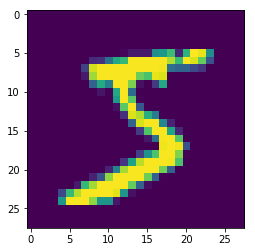

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

# Matplotlib is a Python 2D plotting library which produces publication quality figures 
# in a variety of hardcopy formats and interactive environments across platforms. 
# Here we use it to show an example of how an image in a mnist training data looks like.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

# numpy.reshape() gives a new shape to an array without changing its data.
# Here it is done to indicate the the number of color channels , here it is 1 as it is a grayscale image.
# If it was a RGB it will be changed to 3.

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# ndarray.astype() is used to cast a copy of the array to a specified type.
# And we divide the whole training and testing data by 255 to normalise it to values between 0 and 1.

In [7]:
y_train[:10]

# Here we print the training outputs to check whether all 10 distinct outputs are there or not.

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

# to_categorical - Converts a class vector (integers) to binary class matrix.
# It returns binary matrix representation of the input, where the bit corresponding to each class number wiil be 1 and 
# everything else is 0.

In [9]:
Y_train[:10]

# Here we print out the binary matrix representation of the training output. 


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [10]:
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
model = Sequential()

 
model.add(Convolution2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) #Receptive Field = 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input_shape=(26,26,16) #Receptive Field = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 1, 1, activation='relu')) #input_shape=(24,24,16) #Receptive Field = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) #input_shape=(24,24,10)

model.add(Convolution2D(16, 3, 3, activation='relu')) #input_shape=(12,12,10) #Receptive Field = 10x10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input_shape=(10,10,16) #Receptive Field = 12x12
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input_shape=(8,8,16) #Receptive Field = 14x14
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, 3, 3, activation='relu')) #input_shape=(6,6,16) #Receptive Field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, 4, 4)) #input_shape=(4,4,16) #Receptive Field = 18x18

model.add(Flatten())
model.add(Activation('softmax'))


# As we know Sequential creates a model that is a linear stack of layers.model.add() adds layers one by one  in this stack.
# Activation - It can be used through an Activation layer, or through the activation argument supported by all forward layers.
# Here we use 'relu 'in the argument of add(). ReLU converts all the pixel values between [-1,1] to [0,1].
# MaxPooling2D - It performs Max pooling operation for spatial data. Here we spcify 2x2 maxpooling , therefore it will take the max 
# value of various 2x2 sections of the image , and the output size of the image will reduce by half or else in other words 
# we filter out 75% of data. 
# At last we flatten the data using Flatten() and using softmax activation to get the final output.
# Softmax - It is used because some vector components could be negative, or greater than one; and might not sum to 1, but after applying 
# softmax,each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities.
# And during prediction the highest probability one will be taken as the output and if this matches the ground truth , 
# we have a correct prediction , otherwise a false prediction.
# The first argument of the Convolution2D is the number of 3x3 filters that is used in that layer
# summary() prints the summary of the whole network.

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API:

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 10)        100       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 10)        40        
_________________________________________________________________
dropout_1 (Dropout)          (None, 26, 26, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 16)        1456      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 10)        170       
__________

In [0]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# complile() configures the model for training and we define what all metrics is calculated during training, 
# here its accurancy only.
# categorical_crossentropy- It is a Softmax activation plus a Cross-Entropy loss. If we use this loss, we will train a CNN 
# to output a probability over the C-classes for each image.
# Since we have mulitple classes , we use categorical crossentropy to calculate the loss.
# Adam - Adam is an optimization algorithm that can used to update network weights iterative based in training data.
# After calculating the loss, we use adam with the help of the categorical_crossentropy loss calculated of the training data.

In [13]:
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

# fit() trains the above model for a given number of epochs.
# Epochs are the number of iterations on a dataset.
# We also define batch size = 32 , which the number of images passed through the network for each epoch.
# verbose is set to 1 so that we can see the progess bar.

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 16s 264us/step - loss: 0.2073 - acc: 0.9351 - val_loss: 0.0498 - val_acc: 0.9845
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 11s 176us/step - loss: 0.0638 - acc: 0.9800 - val_loss: 0.0490 - val_acc: 0.9841
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 10s 172us/step - loss: 0.0481 - acc: 0.9847 - val_loss: 0.0367 - val_acc: 0.9882
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 10s 169us/step - loss: 0.0423 - acc: 0.9864 - val_loss: 0.0262 - val_acc: 0.9913
Epoch 5/20

Epoch 00005: LearningRateScheduler settin

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

# evaluvate() returns the loss value & accuracy for the model in test mode.
# Here also computation is done in batches.

In [17]:
print(score)

# Here we the test score , which is a list of scalars which includes loss and accuracy.

[0.021347353606535762, 0.9928]


In [0]:
y_pred = model.predict(X_test)

# predict() generates output predictions for the input samples.
# Here also computation is done in batches.

In [19]:
print(y_pred[:9])
print(y_test[:9])

# Here we print the output predictions from the model and the outputs from the ground truth, 
# to check how much correct predictions we got.

[[8.77057246e-11 5.71539431e-07 8.40801079e-07 4.92223720e-08
  5.78605341e-09 1.09335319e-10 3.57212930e-13 9.99998093e-01
  1.70229497e-10 4.24406124e-07]
 [1.78877514e-07 3.32855137e-07 9.99997497e-01 1.56527289e-08
  4.04195538e-10 4.46843153e-11 2.02747492e-06 1.87813654e-09
  9.46233047e-09 7.46540815e-11]
 [8.62042384e-08 9.99997854e-01 5.42113483e-08 4.89118079e-09
  1.57588772e-07 6.06282029e-08 5.46180949e-08 1.79343317e-06
  5.24373149e-08 3.35998962e-09]
 [9.99928951e-01 7.72108599e-10 5.99256182e-08 4.91665162e-08
  9.27818178e-09 8.21759215e-07 6.80890807e-05 8.21758395e-09
  4.04850482e-07 1.61498951e-06]
 [3.20532645e-09 7.53953611e-09 2.88989888e-10 1.74606011e-12
  9.99996901e-01 1.60461006e-10 7.59504293e-10 7.10133818e-09
  4.44707515e-09 3.11360964e-06]
 [5.34861222e-08 9.99995708e-01 6.62337598e-08 1.53147617e-09
  3.68761903e-07 1.10372120e-08 1.82152746e-08 3.78486834e-06
  4.53887559e-08 2.99621505e-09]
 [1.43992119e-11 4.78219999e-06 1.14921036e-07 1.18083546e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
#print (layer_dict)

# Creates a dictionary of convolution layers outputs with their corresponding layer names. 

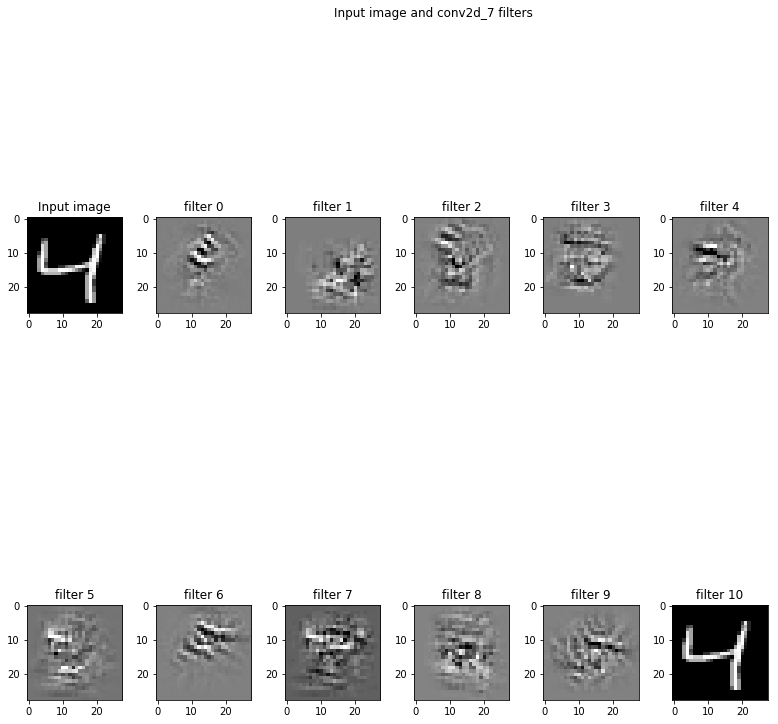

In [27]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_7'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()


# This part of code prints out the the matplot visualizations of any convolution layer, including the input image
# and its filter images. We just have to specify the convolution layer name.
# deprocess_image() converts the tensor into a valid image
# vis_img_in_filter() does the rest of the processing for each filter in a layer.

Observations

In the final network, i optimised the network by adding Adam optimiser, with a starting learing rate at 0.003 and slowly decreasing the learning rate at every epoch by using a scheduler function. By doing so, the required validation accuracy of 99.43 was achievd at the 15th epoch of training.